# Linear Regression with scikit-learn
Here, I will be implementing *Linear Regression* on dataset.
I will complete learning following topics.
    1. A typical problem statement for machine learning
    2. Downloading and exploring a dataset for machine learning
    3. Linear regression with one variable using Scikit-learn
    4. Linear regression with multiple variables
    5. Using categorical features for machine learning
    6. Regression coefficients and feature importance
    7. Other models and techniques for regression using Scikit-learn
    8. Applying linear regression to other datasets

# Problem Statement
In this notebook, I will be learning topic using coding focused approach.
In simple words, I will be learning topic using top-down approach where I will be first doing implementation with code and while doing implementation itself, I will be going in detail to understand theory.
I am taking one dataset given in tutorial I am following and will be defining and using both *Machine Learning* and *Linear Regression* terms in context of that problem and after preparing model, I will be generalizing them based on my understanding.

## Question
ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

![Image representing dataset head](DataExplain.png "Dataset")

## Downloading Data

In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1f9897ef580>)

## Creating Dataframe
Creating dataframe of csv using pandas

In [4]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In dataset, "age", "bmi", "children" and "charges" are numbers (Either int or float). Other attributes are having different data types. Non-null values in each column is 1338 which means there are no missing values, which is going to save our time.

In [9]:
medical_df.shape

(1338, 7)

## Dataset Analysis
Dataset is having 1338 rows and 7 columns.Each row of the dataset contains information about one customer.

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

## Exploratory Analysis and Visualization
Here, We will try to visualize relationship between charges and other attributes. 
We will be using matplotlib, seaborn and plotly for visualization.  

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

Setting parameters to make charts look better

In [11]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's now discuss about dataset column by column

### Age
Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [12]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [13]:
fig = px.histogram(medical_df,
                    x='age',
                    marginal='box',
                    nbins=47,
                    title='Histogram for age distribution')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

### Body Mass Index (BMI)
Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [14]:
fig = px.histogram(medical_df,
                    x='bmi',
                    marginal='box',
                    color_discrete_sequence=['red'],
                    title='Histogram for BMI')
fig.update_layout(bargap=0.1)
fig.show()

### Charges
Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [15]:
fig = px.histogram(medical_df,
                    x='charges',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['green','grey'],
                    title='Anual medical chqarges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

1. For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
2. There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to $35,000.

In [16]:
fig = px.histogram(medical_df,
                    x='charges',
                    color='sex',
                    title='Distribution of medical charges in connection with "sex"',
                    marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
fig = px.histogram(medical_df,
                    x='charges',
                    color='region',
                    marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

### Smoker
Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [18]:
fig = px.histogram(medical_df,
                    x='smoker',
                    color='sex',
                    title='Smoker')
fig.show()

In [19]:
fig = px.histogram(medical_df,
                    x='sex')
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
fig = px.histogram(medical_df, x='region')
fig.update_layout(bargap=0.1)
fig.show()

In [21]:
fig = px.histogram(medical_df, x='children')
fig.update_layout(bargap=0.1)
fig.show()

Now, We are going to visualize relationship between columns!

### Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [22]:
fig = px.scatter(medical_df,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

1. The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

2. We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

        a. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

        b. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

        c. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### BMI and Charges
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [23]:
fig = px.scatter(medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'])
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

In [24]:
fig=px.violin(medical_df,
                x='children',
                y='charges')
fig.update_traces(marker_size=5)
fig.show()

## Correlation
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [25]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [26]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [27]:
medical_df.bmi.corr(medical_df.age)

0.10927188154853519

To compute the correlation for categorical columns, they must first be converted into numeric columns.



In [28]:
smoker_val = {'no':0, 'yes':1}
smoker_num = medical_df.smoker.map(smoker_val)
medical_df.charges.corr(smoker_num)

0.7872514304984778

Here's how correlation coefficients can be interpreted:
1. Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    1. The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    2. A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

    3. When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

2. Direction: The sign of the correlation coefficient represents the direction of the relationship.

    1. Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

    2. Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

![Image for Correlation](Correlation.png 'Correlation Understanding')

The correlation coefficient has the following formula:

![Formula of Correlation](CorrelationFormula.png 'Correlation Formula')

In [29]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


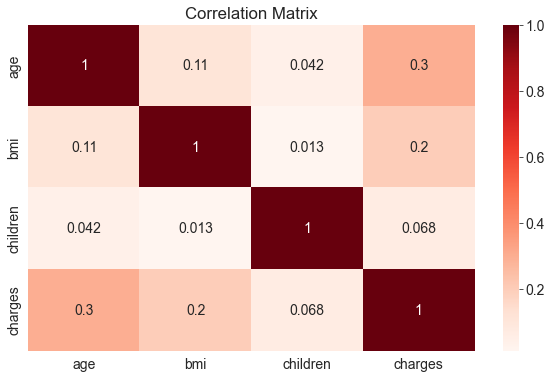

In [30]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

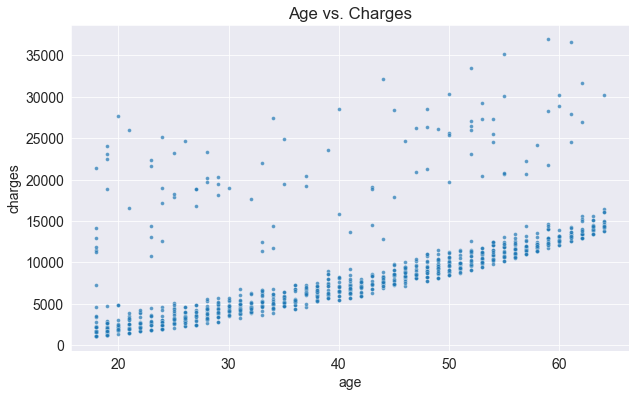

In [31]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept"). 

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data. 

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line. 

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets". 

Let define a helper function `estimate_charges`, to compute $charges$, given $age$, $w$ and $b$.

In [32]:
def estimate_charges(age, w, b):
    return w * age + b

In [33]:
w = 50
b = 100
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

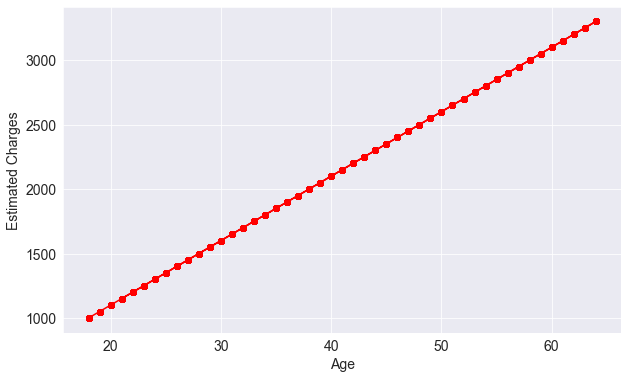

In [34]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

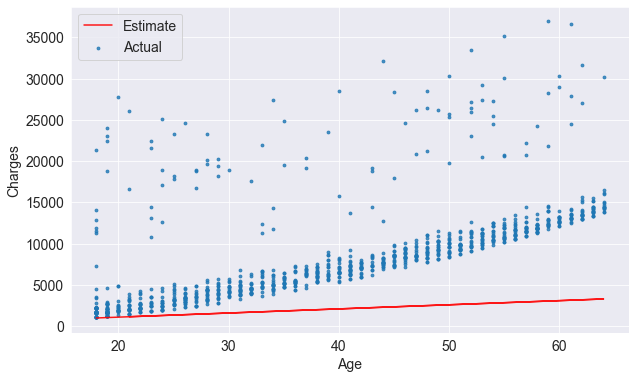

In [35]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [36]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

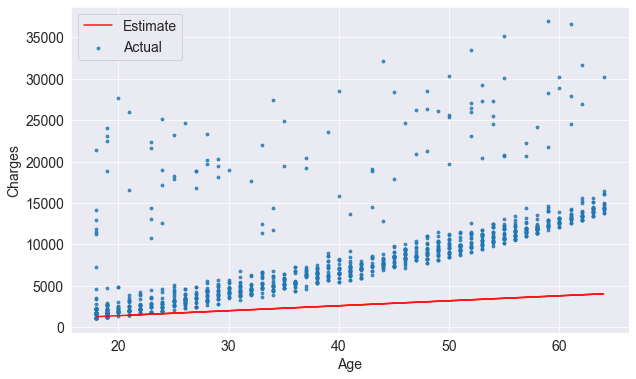

In [37]:
try_parameters(60, 200)